# Support Vector Machines

# Salary Dataset

In [1]:
# import liberies
import pandas as pd
import numpy as np
import seaborn as sns

# Salary_test

In [2]:
# load dataset
salary_test = pd.read_csv("/Users/Admin/Documents/data science assignment/support vector machines/SalaryData_Test.csv")
salary_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


# Data Cleaning

In [3]:
salary_test.shape

(15060, 14)

In [4]:
salary_test.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [5]:
salary_test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [31]:
salary_test.shape

(15060, 14)

In [32]:
salary_test.dtypes

age              int64
workclass        int32
education        int32
educationno      int64
maritalstatus    int32
occupation       int32
relationship     int32
race             int32
sex              int32
capitalgain      int64
capitalloss      int64
hoursperweek     int64
native           int32
Salary           int32
dtype: object

In [33]:
print("Correlation:", salary_test.corr(method='pearson'))

Correlation:                     age  workclass  education  educationno  maritalstatus  \
age            1.000000   0.096055  -0.007950     0.026120      -0.262677   
workclass      0.096055   1.000000   0.018005     0.046623      -0.031329   
education     -0.007950   0.018005   1.000000     0.351486      -0.043117   
educationno    0.026120   0.046623   0.351486     1.000000      -0.068079   
maritalstatus -0.262677  -0.031329  -0.043117    -0.068079       1.000000   
occupation    -0.002221   0.021271  -0.023999     0.093643       0.003854   
relationship  -0.249752  -0.060235  -0.014227    -0.081413       0.185495   
race           0.024481   0.059749   0.012133     0.029355      -0.073718   
sex            0.082257   0.059161  -0.026978    -0.002052      -0.120374   
capitalgain    0.127050   0.011708   0.036765     0.154273      -0.071938   
capitalloss    0.057758   0.012060   0.021014     0.087055      -0.033655   
hoursperweek   0.102898   0.050933   0.063924     0.136973     

# Data visualizations

(array([1824., 1990., 1992., 1187., 1004., 1596., 2059.,  332., 1824.,
        1252.]),
 array([ 0. ,  1.3,  2.6,  3.9,  5.2,  6.5,  7.8,  9.1, 10.4, 11.7, 13. ]),
 <BarContainer object of 10 artists>)

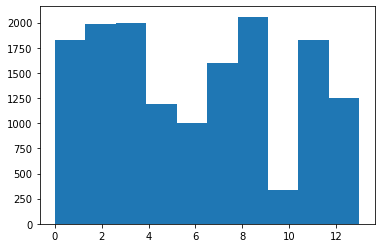

In [35]:
plt.hist((salary_test.occupation))

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'workclass'}>,
        <AxesSubplot:title={'center':'education'}>,
        <AxesSubplot:title={'center':'educationno'}>],
       [<AxesSubplot:title={'center':'maritalstatus'}>,
        <AxesSubplot:title={'center':'occupation'}>,
        <AxesSubplot:title={'center':'relationship'}>,
        <AxesSubplot:title={'center':'race'}>],
       [<AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'capitalgain'}>,
        <AxesSubplot:title={'center':'capitalloss'}>,
        <AxesSubplot:title={'center':'hoursperweek'}>],
       [<AxesSubplot:title={'center':'native'}>,
        <AxesSubplot:title={'center':'Salary'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

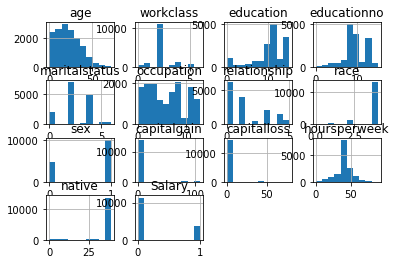

In [36]:
salary_test.hist()

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

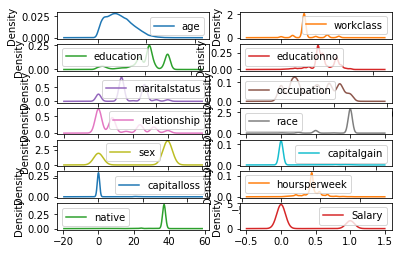

In [40]:
salary_test.plot(kind='density', subplots=True, layout=(7,2), sharex=False, sharey=False)

age                 AxesSubplot(0.125,0.787927;0.352273x0.0920732)
workclass        AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
education           AxesSubplot(0.125,0.677439;0.352273x0.0920732)
educationno      AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
maritalstatus       AxesSubplot(0.125,0.566951;0.352273x0.0920732)
occupation       AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
relationship        AxesSubplot(0.125,0.456463;0.352273x0.0920732)
race             AxesSubplot(0.547727,0.456463;0.352273x0.0920732)
sex                 AxesSubplot(0.125,0.345976;0.352273x0.0920732)
capitalgain      AxesSubplot(0.547727,0.345976;0.352273x0.0920732)
capitalloss         AxesSubplot(0.125,0.235488;0.352273x0.0920732)
hoursperweek     AxesSubplot(0.547727,0.235488;0.352273x0.0920732)
native                 AxesSubplot(0.125,0.125;0.352273x0.0920732)
Salary              AxesSubplot(0.547727,0.125;0.352273x0.0920732)
dtype: object

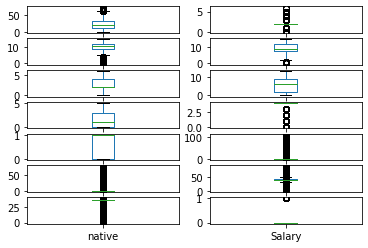

In [41]:
salary_test.plot(kind='box', subplots=True, layout=(7,2), sharex=False, sharey=False)

[Text(0, 0, 'age'),
 Text(0, 1, 'workclass'),
 Text(0, 2, 'education'),
 Text(0, 3, 'educationno'),
 Text(0, 4, 'maritalstatus'),
 Text(0, 5, 'occupation'),
 Text(0, 6, 'relationship'),
 Text(0, 7, 'race'),
 Text(0, 8, 'sex'),
 Text(0, 9, 'capitalgain'),
 Text(0, 10, 'capitalloss'),
 Text(0, 11, 'hoursperweek'),
 Text(0, 12, 'native'),
 Text(0, 13, 'Salary')]

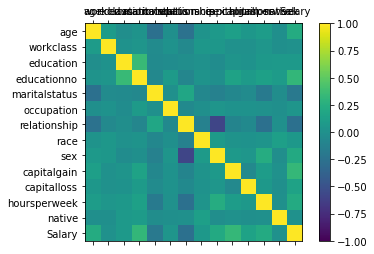

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(salary_test.corr(), vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(salary_test.columns)
ax.set_yticklabels(salary_test.columns)

In [44]:
salary_test.loc[salary_test['Salary'] == ' >50K', 'Salary'] = 1
salary_test.loc[salary_test['Salary'] == ' <=50K', 'Salary'] = 0

In [45]:
salary_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,8,2,1,6,4,6,3,2,1,0,0,39,37,0
1,21,2,11,8,2,4,0,4,1,0,0,49,37,0
2,11,1,7,11,2,10,0,4,1,0,0,39,37,1
3,27,2,15,9,2,6,0,2,1,87,0,39,37,1
4,17,2,0,5,4,7,1,4,1,0,0,29,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,16,2,9,12,4,9,3,4,1,0,0,39,37,0
15056,22,2,9,12,0,9,1,4,0,0,0,35,37,0
15057,21,2,9,12,2,9,0,4,1,0,0,49,37,0
15058,27,2,9,12,0,0,3,1,1,73,0,39,37,0


# Data Processing

In [46]:
from sklearn.preprocessing import LabelEncoder
labelencoder_test = LabelEncoder()
salary_test=salary_test.apply(LabelEncoder().fit_transform)

In [47]:
X_test = salary_test.drop(['Salary'],axis = 1)
Y_test = salary_test['Salary']

In [48]:
X_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,8,2,1,6,4,6,3,2,1,0,0,39,37
1,21,2,11,8,2,4,0,4,1,0,0,49,37
2,11,1,7,11,2,10,0,4,1,0,0,39,37
3,27,2,15,9,2,6,0,2,1,87,0,39,37
4,17,2,0,5,4,7,1,4,1,0,0,29,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,16,2,9,12,4,9,3,4,1,0,0,39,37
15056,22,2,9,12,0,9,1,4,0,0,0,35,37
15057,21,2,9,12,2,9,0,4,1,0,0,49,37
15058,27,2,9,12,0,0,3,1,1,73,0,39,37


# Salary_Train

In [49]:
salary_train=pd.read_csv('/Users/Admin/Documents/data science assignment/support vector machines/SalaryData_Train.csv')
salary_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# Data Cleaning

In [50]:
salary_train.shape

(30161, 14)

In [51]:
salary_train.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [52]:
salary_train.loc[salary_train['Salary'] == ' >50K', 'Salary'] = 1
salary_train.loc[salary_train['Salary'] == ' <=50K', 'Salary'] = 0

In [53]:
salary_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


# Data Processing

In [54]:
labelencoder_train = LabelEncoder()
salary_train=salary_train.apply(LabelEncoder().fit_transform)

In [55]:
salary_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,22,5,9,12,4,0,1,4,1,24,0,39,37,0
1,33,4,9,12,2,3,0,4,1,0,0,12,37,0
2,21,2,11,8,0,5,1,4,1,0,0,39,37,0
3,36,2,1,6,2,5,0,2,1,0,0,39,37,0
4,11,2,9,12,2,9,5,2,0,0,0,39,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,10,2,7,11,2,12,5,4,0,0,0,37,37,0
30157,23,2,11,8,2,6,0,4,1,0,0,39,37,1
30158,41,2,11,8,6,0,4,4,0,0,0,39,37,0
30159,5,2,11,8,4,0,3,4,1,0,0,19,37,0


In [56]:
X_train = salary_train.drop(['Salary'],axis=1)
Y_train = salary_train['Salary']

In [57]:
X_train 

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,22,5,9,12,4,0,1,4,1,24,0,39,37
1,33,4,9,12,2,3,0,4,1,0,0,12,37
2,21,2,11,8,0,5,1,4,1,0,0,39,37
3,36,2,1,6,2,5,0,2,1,0,0,39,37
4,11,2,9,12,2,9,5,2,0,0,0,39,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,10,2,7,11,2,12,5,4,0,0,0,37,37
30157,23,2,11,8,2,6,0,4,1,0,0,39,37
30158,41,2,11,8,6,0,4,4,0,0,0,39,37
30159,5,2,11,8,4,0,3,4,1,0,0,19,37


# Build Model using SVC for linear

In [58]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [59]:
# kernel = linear
model_linear = SVC(kernel = "linear")
model_linear.fit(X_train,Y_train)
pred_test_linear = model_linear.predict(X_test)

np.mean(pred_test_linear==Y_test)


0.8041832669322709

#### Using linear Kernel for gas_turbines dataset accuary for prediction model is 80.4%

# Build Model using SVC for Polynomial

In [60]:
# kernel = poly
model_poly = SVC(kernel = "poly")
model_poly.fit(X_train,Y_train)
pred_test_poly = model_poly.predict(X_test)
np.mean(pred_test_poly==Y_test) 

0.8195219123505976

#### Using Polynomial Kernel for gas_turbines dataset accuary for prediction model is 81.9%

# Build Model using SVC for Radial basis function

In [61]:
# kernel = rbf
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(X_train,Y_train)
pred_test_rbf = model_rbf.predict(X_test)

np.mean(pred_test_rbf==Y_test)


0.8118193891102258

#### Using Radial basis function Kernel for gas_turbines dataset accuary for prediction model is 81.18%

# Build Model using SVC for Sigmoid

In [62]:
#'sigmoid'
model_sig = SVC(kernel = "sigmoid")
model_sig.fit(X_train,Y_train)
pred_test_sig = model_rbf.predict(X_test)

np.mean(pred_test_sig==Y_test) 

0.8118193891102258

#### Using Sigmoid Kernel for gas_turbines dataset accuary for prediction model is 81.18%